### El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Lectura del archivo
ruta = 'data_banco.csv'
data = pd.read_csv(ruta)

### Traduccion de columnas y filas a español

In [93]:
# Mapeo de columnas
col_trad = {
    'age': 'edad', 'job': 'trabajo', 'marital': 'estado_civil', 'education': 'educacion',
    'default': 'morosidad', 'balance': 'saldo', 'housing': 'vivienda', 'loan': 'prestamo',
    'contact': 'contacto', 'day': 'dia', 'month': 'mes', 'duration': 'duracion',
    'campaign': 'campaña', 'pdays': 'dias_ult_contacto', 'previous': 'contactos_previos',
    'poutcome': 'resultado_previo', 'y': 'resultado'
}

data.rename(columns=col_trad, inplace=True)

# Mapeo de valores categóricos
fil_trad = {
    'trabajo': {
        'management': 'gerencia', 'technician': 'técnico', 'entrepreneur': 'empresario',
        'blue-collar': 'obrero', 'unknown': 'desconocido', 'retired': 'jubilado',
        'admin.': 'administrativo', 'services': 'servicios', 'self-employed': 'autónomo',
        'Management': 'gerencia', 'MANAGEMENT': 'gerencia', 'Self-employed': 'autónomo',
        'SELF-EMPLOYED': 'autónomo', 'Admin.': 'administrativo'
    },
    'estado_civil': {
        'married': 'casado', 'single': 'soltero', 'divorced': 'divorciado', 
        'div.': 'divorciado', 'Married': 'casado', 'Single': 'soltero',
        'Divorced': 'divorciado', 'Div.': 'divorciado'
    },
    'educacion': {
        'tertiary': 'superior', 'secondary': 'secundaria', 'primary': 'primaria', 
        'unknown': 'desconocido', 'sec.': 'secundaria', 'unk': 'desconocido',
        'Secondary': 'secundaria', 'Primary': 'primaria', 'Unknown': 'desconocido',
        'Sec.': 'secundaria', 'Unk': 'desconocido'
    },
    'morosidad': {'no': 'no', 'yes': 'sí', 'No': 'no', 'YES': 'sí'},
    'vivienda': {'no': 'no', 'yes': 'sí', 'No': 'no', 'YES': 'sí'},
    'prestamo': {'no': 'no', 'yes': 'sí', 'No': 'no', 'YES': 'sí'},
    'contacto': {
        'unknown': 'desconocido', 'telephone': 'teléfono', 'phone': 'teléfono',
        'mobile': 'celular', 'cellular': 'celular', 'Unknown': 'desconocido',
        'Telephone': 'teléfono', 'Phone': 'teléfono', 'Mobile': 'celular',
        'Cellular': 'celular'
    },
    'mes': {
        'jan': 'enero', 'feb': 'febrero', 'mar': 'marzo', 'apr': 'abril',
        'may': 'mayo', 'jun': 'junio', 'jul': 'julio', 'aug': 'agosto',
        'sep': 'septiembre', 'oct': 'octubre', 'nov': 'noviembre', 'dec': 'diciembre',
        'JAN': 'enero', 'FEB': 'febrero', 'MAR': 'marzo', 'APR': 'abril',
        'MAY': 'mayo', 'JUN': 'junio', 'JUL': 'julio', 'AUG': 'agosto',
        'SEP': 'septiembre', 'OCT': 'octubre', 'NOV': 'noviembre', 'DEC': 'diciembre'
    },
    'resultado_previo': {
        'unknown': 'desconocido', 'failure': 'fracaso', 'success': 'éxito',
        'other': 'otro', 'unk': 'desconocido', 'Unknown': 'desconocido',
        'Failure': 'fracaso', 'Success': 'éxito', 'Other': 'otro',
        'Unk': 'desconocido', 'UNK': 'desconocido'
    },
    'resultado': {'no': 'no', 'yes': 'sí', 'No': 'no', 'YES': 'sí'}
}


# Aplicar traducción de valores
data = data.replace(fil_trad)

## Exploracion inicial del DataFrame

In [94]:
print(data.shape)
data.head()

(45215, 17)


,edad,trabajo,estado_civil,educacion,morosidad,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campaña,dias_ult_contacto,contactos_previos,resultado_previo,resultado
0,58,gerencia,casado,superior,no,2143.0,sí,no,desconocido,5,mayo,261.0,1,-1.0,0,desconocido,no
1,44,técnico,soltero,secundaria,no,29.0,sí,no,desconocido,5,mayo,151.0,1,-1.0,0,desconocido,no
2,33,empresario,casado,secundaria,no,2.0,sí,sí,desconocido,5,mayo,76.0,1,-1.0,0,desconocido,no
3,47,obrero,casado,desconocido,no,1506.0,sí,no,desconocido,5,mayo,92.0,1,-1.0,0,desconocido,no
4,33,desconocido,soltero,desconocido,no,1.0,no,no,desconocido,5,mayo,198.0,1,-1.0,0,desconocido,no


In [95]:
# Información general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               45215 non-null  int64  
 1   trabajo            45213 non-null  object 
 2   estado_civil       45214 non-null  object 
 3   educacion          45214 non-null  object 
 4   morosidad          45215 non-null  object 
 5   saldo              45213 non-null  float64
 6   vivienda           45215 non-null  object 
 7   prestamo           45215 non-null  object 
 8   contacto           45215 non-null  object 
 9   dia                45215 non-null  int64  
 10  mes                45215 non-null  object 
 11  duracion           45214 non-null  float64
 12  campaña            45215 non-null  int64  
 13  dias_ult_contacto  45214 non-null  float64
 14  contactos_previos  45215 non-null  int64  
 15  resultado_previo   45215 non-null  object 
 16  resultado          452

# Limpieza

Proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## Datos faltantes

In [96]:
# Eliminar valores nulos
print(f"\nTamaño antes de eliminar nulos: {data.shape}")
data.dropna(inplace=True)
print(f"Tamaño después de eliminar nulos: {data.shape}")



Tamaño antes de eliminar nulos: (45215, 17)
Tamaño después de eliminar nulos: (45207, 17)


### Analisis de variables categoricas

In [97]:
# Conteo de subniveles en variables categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda',
            'prestamo', 'contacto', 'mes', 'resultado_previo', 'resultado']

print("\n=== CONTEO DE SUBNIVELES ===")
for col in cols_cat:
    print(f'Columna {col}: {data[col].nunique()} subniveles')


=== CONTEO DE SUBNIVELES ===
Columna trabajo: 15 subniveles
Columna estado_civil: 4 subniveles
Columna educacion: 7 subniveles
Columna morosidad: 2 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 4 subniveles
Columna contacto: 3 subniveles
Columna mes: 12 subniveles
Columna resultado_previo: 4 subniveles
Columna resultado: 2 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No elimino ninguna.

In [98]:
# Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
display(data.describe())

# Lista de columnas numéricas
cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña', 
            'dias_ult_contacto', 'contactos_previos']


=== ESTADÍSTICAS DESCRIPTIVAS ===


,edad,saldo,dia,duracion,campaña,dias_ult_contacto,contactos_previos
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.


### Filas repetidas

In [99]:
# Eliminar filas duplicadas
print(f"\nTamaño antes de eliminar duplicados: {data.shape}")
data.drop_duplicates(inplace=True)
print(f"Tamaño después de eliminar duplicados: {data.shape}")


Tamaño antes de eliminar duplicados: (45207, 17)
Tamaño después de eliminar duplicados: (45203, 17)


## *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

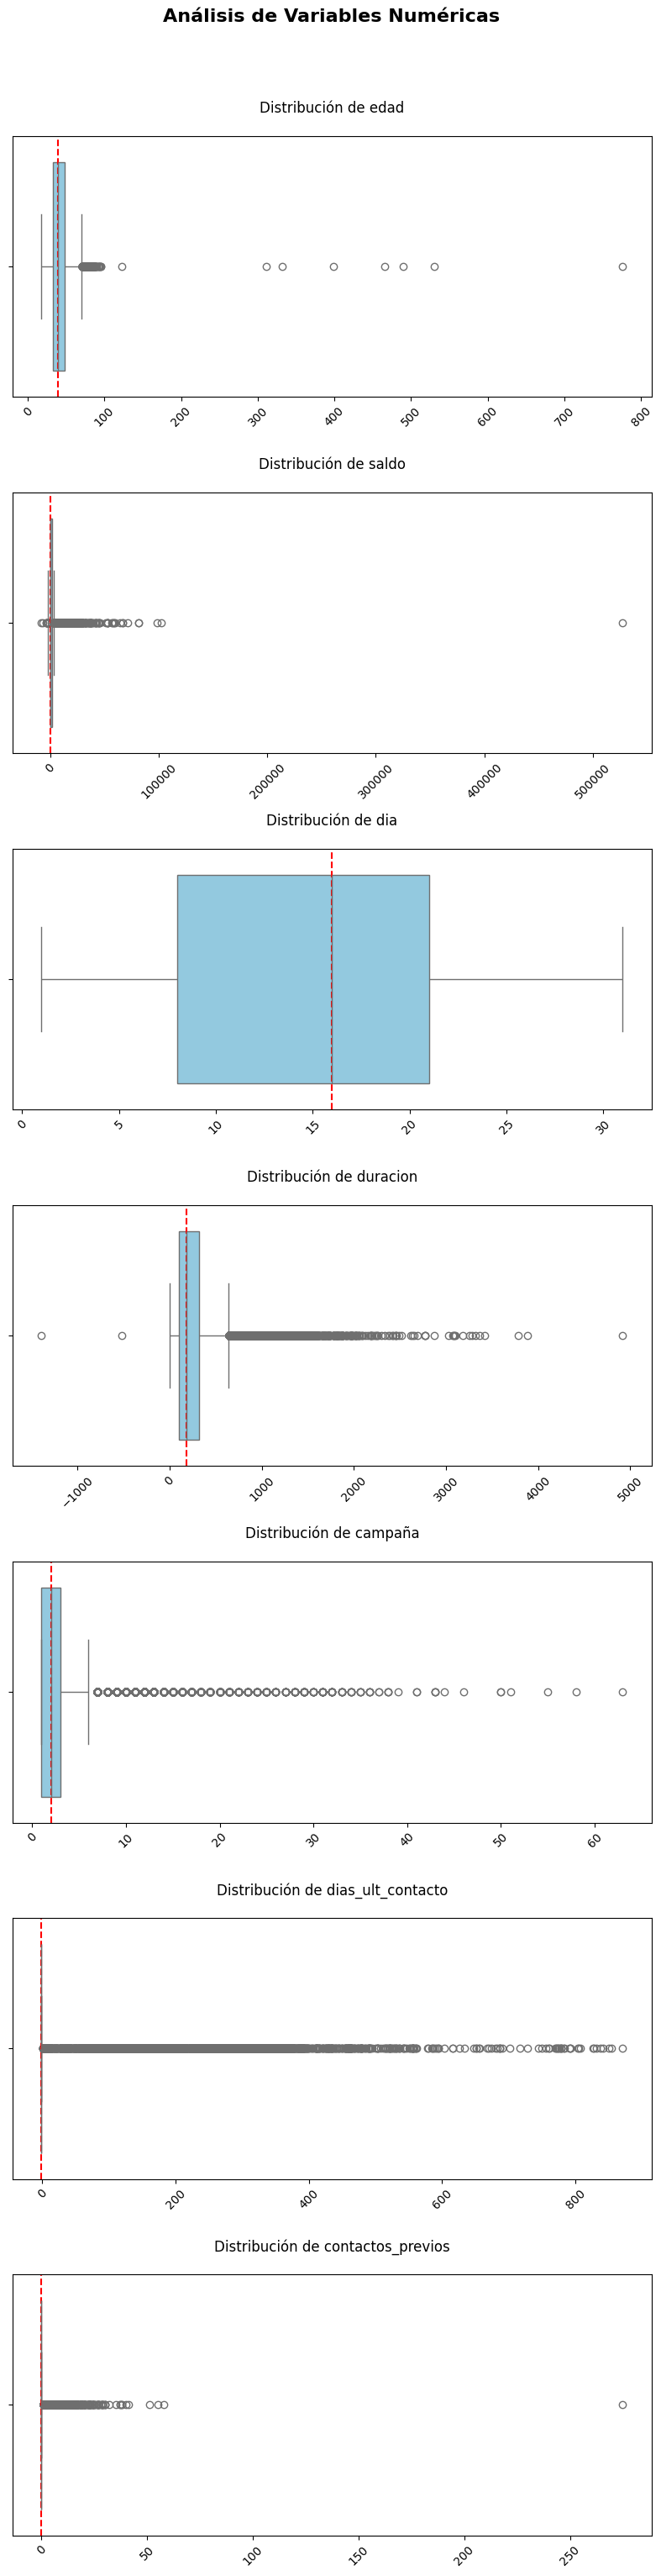

In [100]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes

cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña', 
               'dias_ult_contacto', 'contactos_previos']

# Crear figura con subplots
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.8)  # Aumentamos el espacio entre gráficos

# Generar boxplot para cada variable
for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i], color='skyblue')
    ax[i].set_title(f'Distribución de {col}', fontsize=12, pad=20)
    ax[i].set_xlabel('')  # Eliminar etiqueta del eje x para mayor claridad
    
    # Mejorar la visualización de los valores en el eje x
    ax[i].tick_params(axis='x', rotation=45)
    
    # Añadir línea media para referencia
    ax[i].axvline(data[col].median(), color='red', linestyle='--', linewidth=1.5)
    
plt.suptitle('Análisis de Variables Numéricas', y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()


Observaciones:
- "edad": hay sujetos con edades mucho mayores a 100 años
- "duracion": hay valores negativos
- "contactos_previos": hay un valor extremadamente alto (cercano a 300)

In [101]:
# Eliminar edades mayores a 100 años
print(f"\nTamaño antes de eliminar edades > 100: {data.shape}")
data = data[data['edad'] <= 100]
print(f"Tamaño después de eliminar edades > 100: {data.shape}")


Tamaño antes de eliminar edades > 100: (45203, 17)
Tamaño después de eliminar edades > 100: (45195, 17)


In [ ]:
# Eliminar duraciones negativas
print(f"\nTamaño antes de eliminar duraciones < 0: {data.shape}")
data = data[data['duracion'] > 0]
print(f"Tamaño después de eliminar duraciones < 0: {data.shape}")


Tamaño antes de eliminar duraciones < 0: (45195, 17)
Tamaño después de eliminar duraciones < 0: (45190, 17)


In [103]:
# Eliminar contactos previos mayores a 100
print(f"\nTamaño antes de eliminar contactos_previos > 100: {data.shape}")
data = data[data['contactos_previos'] <= 100]
print(f"Tamaño después de eliminar contactos_previos > 100: {data.shape}")


Tamaño antes de eliminar contactos_previos > 100: (45190, 17)
Tamaño después de eliminar contactos_previos > 100: (45189, 17)


## Errores tipográficos en variables categóricas:

Unificando los sub-niveles

/tmp/ipykernel_67054/2324539497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='viridis')
/tmp/ipykernel_67054/2324539497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='viridis')
/tmp/ipykernel_67054/2324539497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=ax[i], palette='viridis')
/tmp/ipykernel_67054/2324539497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

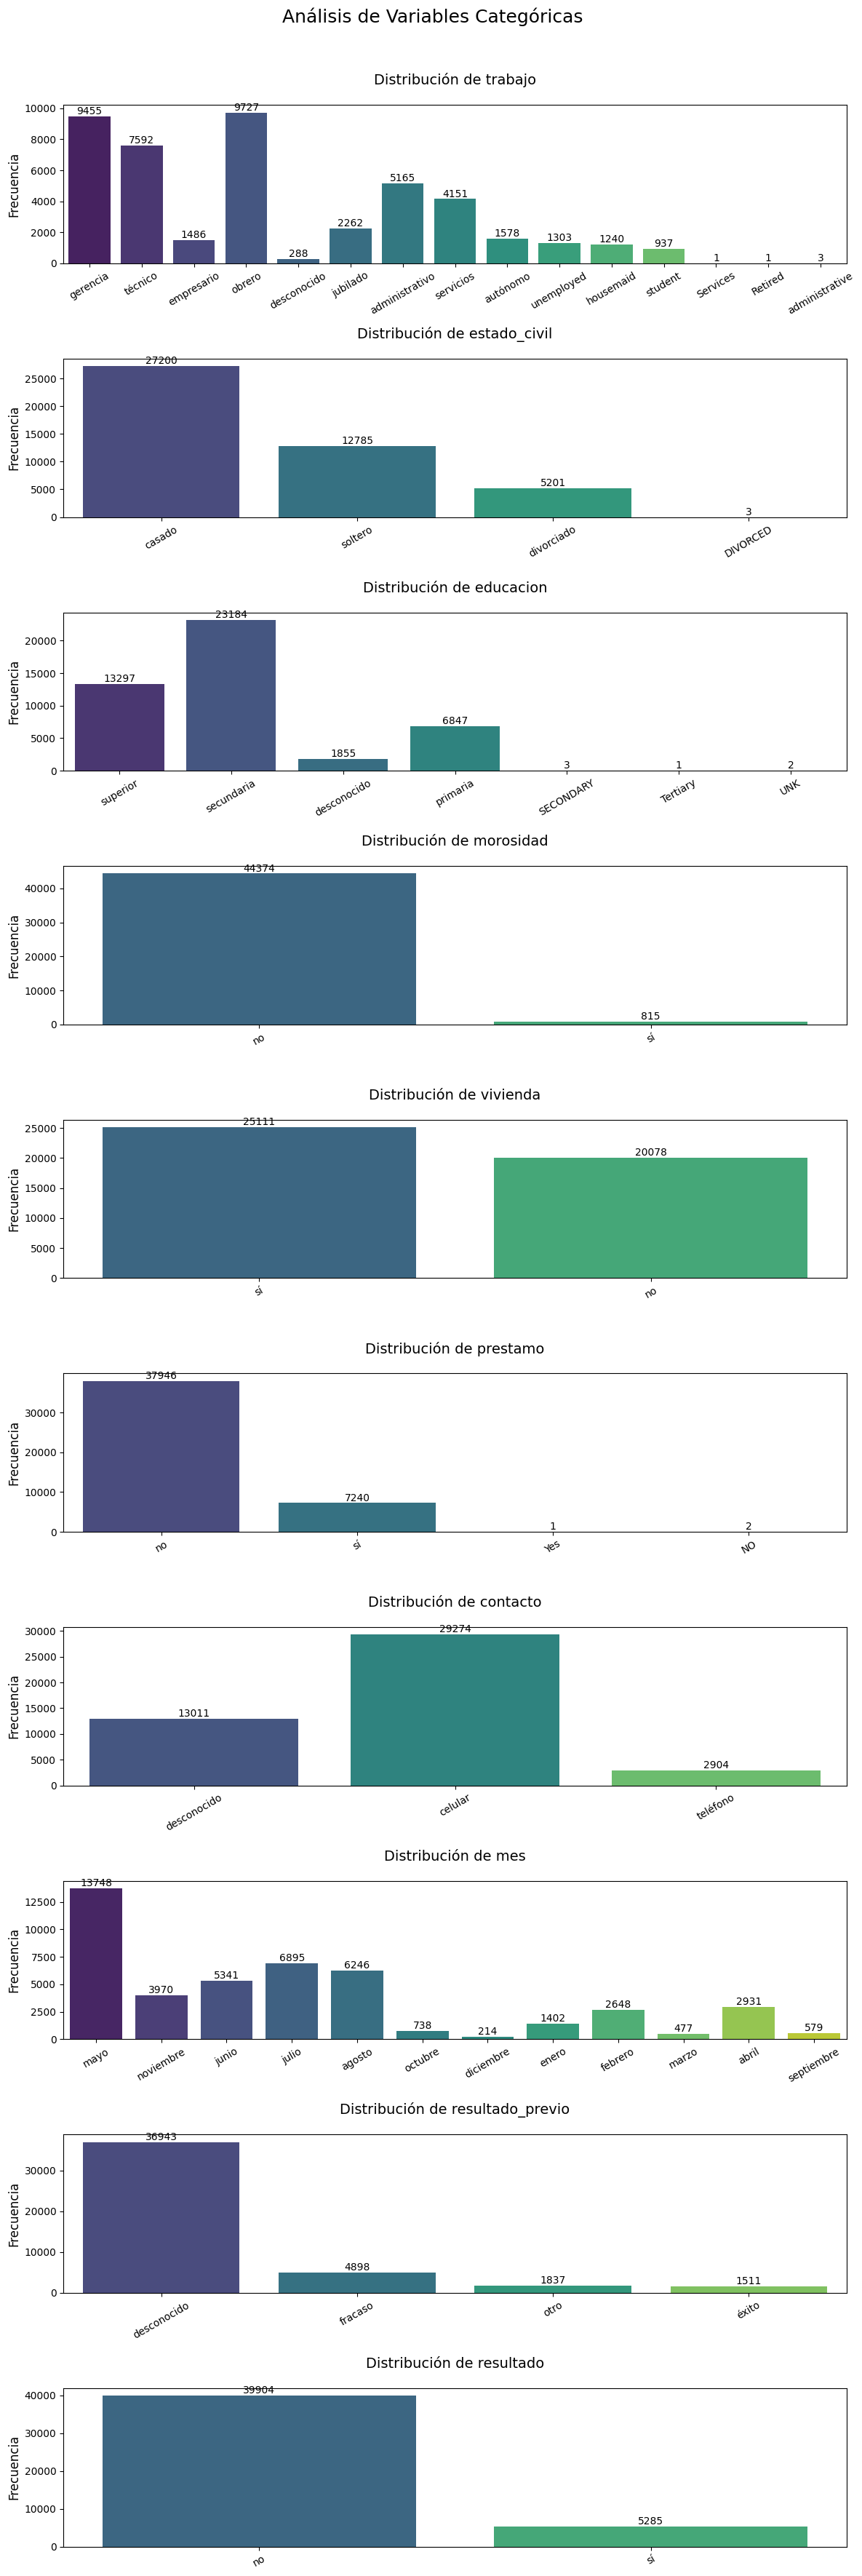

In [104]:
# Graficar los subniveles de cada variable categórica (versión corregida en español)
cols_cat_es = ['trabajo', 'estado_civil', 'educacion', 'morosidad', 'vivienda',
               'prestamo', 'contacto', 'mes', 'resultado_previo', 'resultado']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(12, 35))
fig.subplots_adjust(hspace=1.2)

for i, col in enumerate(cols_cat_es):
    sns.countplot(x=col, data=data, ax=ax[i], palette='viridis')
    ax[i].set_title(f'Distribución de {col}', fontsize=14, pad=20)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frecuencia', fontsize=12)
    
    # Rotar etiquetas sin generar advertencias
    ax[i].tick_params(axis='x', rotation=30)
    
    # Añadir etiquetas de frecuencia en cada barra
    for p in ax[i].patches:
        ax[i].annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points',
                      fontsize=10)

plt.suptitle('Análisis de Variables Categóricas', fontsize=18, y=1.01)
plt.tight_layout()
plt.show()

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unificando estos sub-niveles

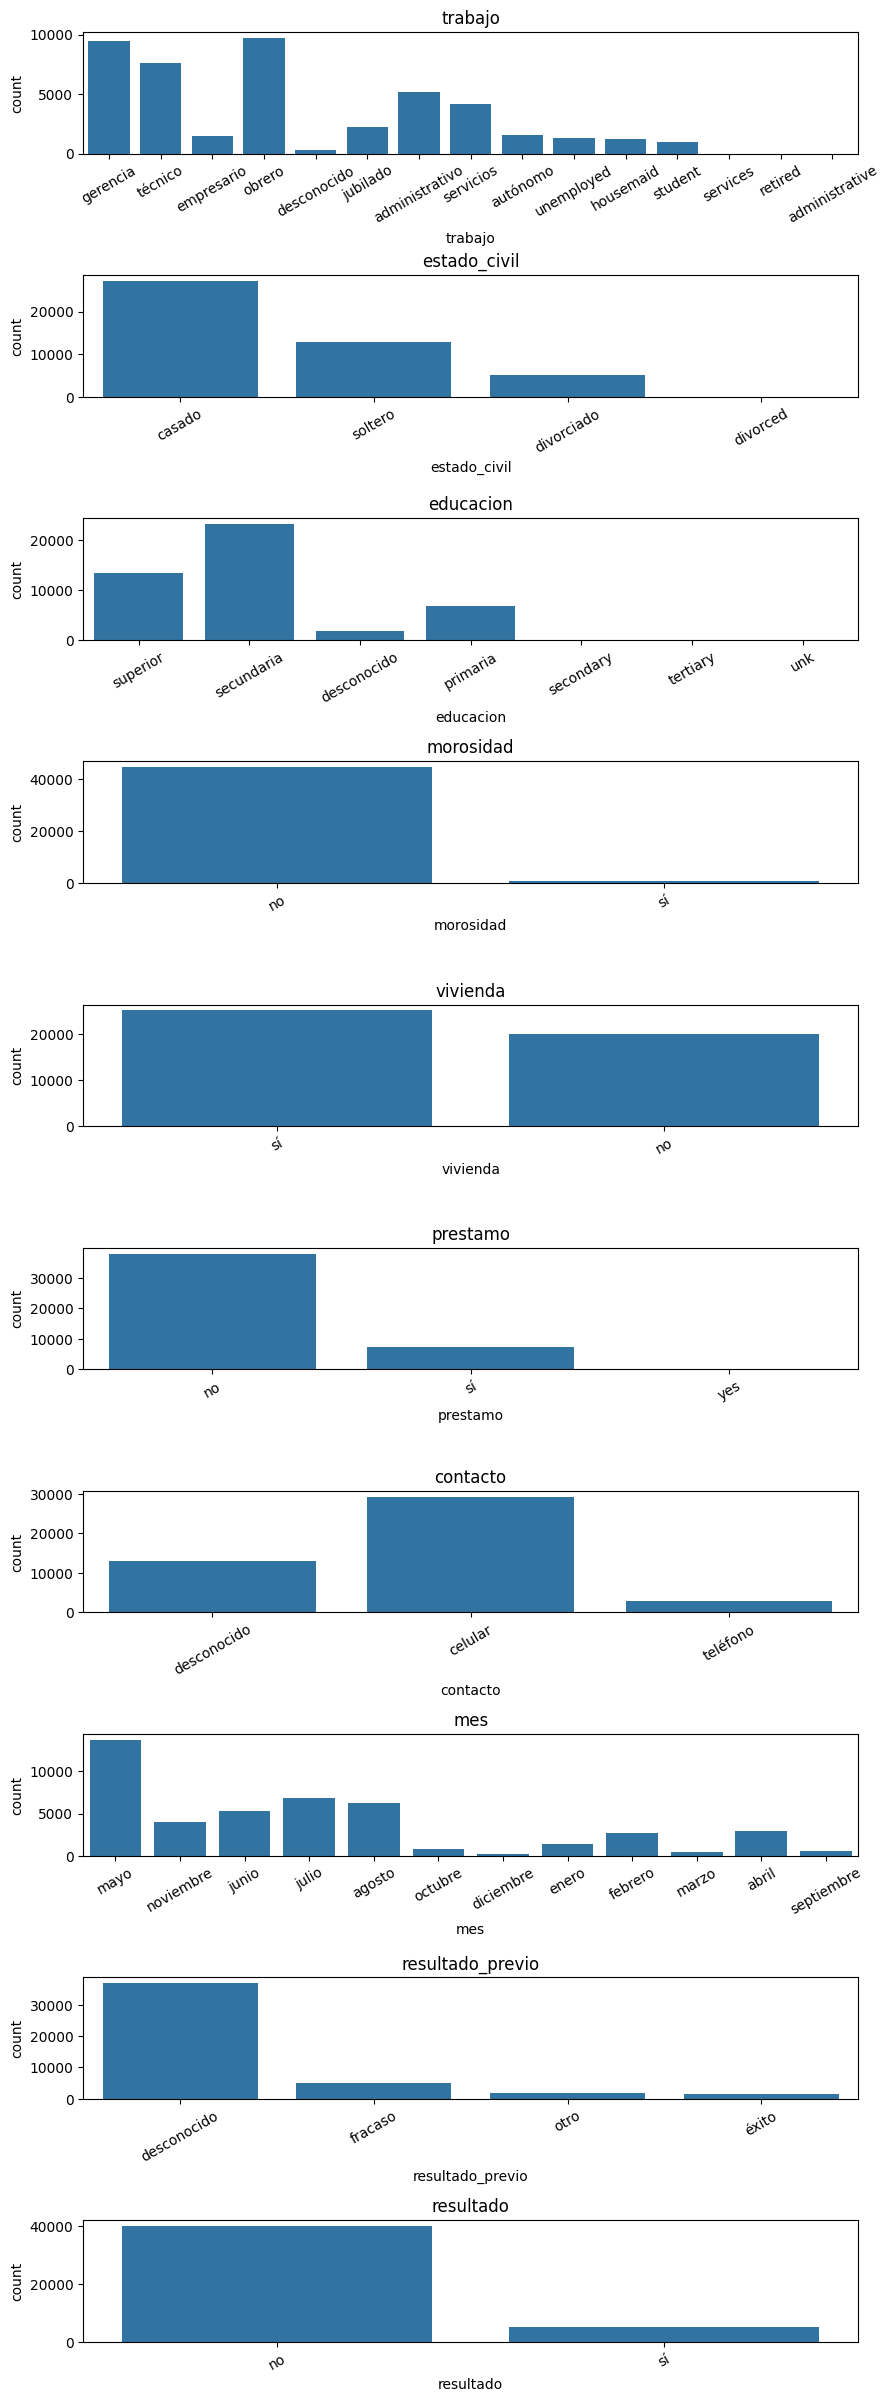

In [105]:
# Unificar a minúsculas
for column in data.columns:
    if column in cols_cat_es:
        data[column] = data[column].str.lower()

# Generar gráficas
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat_es):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)
    # Corrección de advertencias
    ax[i].tick_params(axis='x', rotation=30)

plt.show()

In [106]:
# trabajo: unificar admin. y administrativo
print("Valores únicos antes de unificar:")
print(data['trabajo'].unique())

# Reemplazar 'admin.' por 'administrativo'
data['trabajo'] = data['trabajo'].str.replace('admin.', 'administrativo', regex=False)

print("\nValores únicos después de unificar:")
print(data['trabajo'].unique())

Valores únicos antes de unificar:
['gerencia' 'técnico' 'empresario' 'obrero' 'desconocido' 'jubilado'
 'administrativo' 'servicios' 'autónomo' 'unemployed' 'housemaid'
 'student' 'services' 'retired' 'administrative']

Valores únicos después de unificar:
['gerencia' 'técnico' 'empresario' 'obrero' 'desconocido' 'jubilado'
 'administrativo' 'servicios' 'autónomo' 'unemployed' 'housemaid'
 'student' 'services' 'retired' 'administrative']


In [107]:
# estado_civil: unificar div. y divorciado
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorciado', regex=False)
print(data['estado_civil'].unique())

['casado' 'soltero' 'divorciado' 'divorced']
['casado' 'soltero' 'divorciado' 'divorced']


In [108]:
# educacion: unificar sec. y secundaria, unk y desconocido
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secundaria', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'desconocido'
print(data['educacion'].unique())

['superior' 'secundaria' 'desconocido' 'primaria' 'secondary' 'tertiary'
 'unk']


['superior' 'secundaria' 'desconocido' 'primaria' 'secondary' 'tertiary']


In [109]:
# contacto: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contacto'] = 'teléfono'
data.loc[data['contacto']=='mobile','contacto'] = 'celular'
print(data['contacto'].unique())

['desconocido' 'celular' 'teléfono']
['desconocido' 'celular' 'teléfono']


In [110]:
# resultado_previo: unificar unk y desconocido
print(data['resultado_previo'].unique())
data.loc[data['resultado_previo']=='unk','resultado_previo']='desconocido'
print(data['resultado_previo'].unique())

['desconocido' 'fracaso' 'otro' 'éxito']
['desconocido' 'fracaso' 'otro' 'éxito']


In [111]:
data.shape

(45189, 17)

¡Y listo, ya se realizo la limpieza del set de datos!

Originalmente tenía 45.215 registros y 17 columnas. El dataset resultante tiene 45.189 filas (26 menos) y 17 columnas.

El set de datos ya está listo para el Análisis Exploratorio.